# Final Articles

In [1]:
import pandas as pd
import numpy as np
import itertools
from collections import defaultdict

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()

'/Users/kylehamilton/MyDocuments/ML-Labs/neuro-symbolic-AI/neuro-symbolic-ai-systematic-review/Scopus/matplotlibrc'

In [3]:
df=pd.read_csv('Data/Final_41 - Protocol.csv')

In [4]:
len(df)

41

In [5]:
(df).columns

Index(['Doc type', 'Researcher', 'citation', 'Title', 'Scopus Hash ID', 'DOI',
       'Journal/Conference', 'Year', 'Business Use Case',
       'Technical Application', 'Type of Learning', 'Key-intake',
       'Contribution', 'Authors Definition of NeSy', 'Symbolic terms',
       'Neural terms', 'NeSy Category', 'Kautz category', 'Datasets',
       'Model description', 'Evaluation Metrics', 'Reported Score',
       'Study Quality', 'Comments', 'MISC', 'eliminate', 'Unnamed: 26'],
      dtype='object')

In [6]:
df=df[['Doc type', 'Researcher', 'citation', 'Title', 'Scopus Hash ID', 'DOI',
       'Journal/Conference', 'Year', 'Business Use Case',
       'Technical Application', 'Type of Learning', 'Key-intake',
       'Contribution', 'Authors Definition of NeSy', 'Symbolic terms',
       'Neural terms', 'NeSy Category', 'Kautz category', 'Datasets',
       'Model description', 'Evaluation Metrics', 'Reported Score',
       'Study Quality', 'Comments', 'MISC', 'eliminate']]

In [7]:
# df=df[df['eliminate']!=1.0]
df.drop(df[df.eliminate == 1].index, inplace=True)

In [8]:
df=df.reset_index(drop=True)

In [9]:
len(df)

34

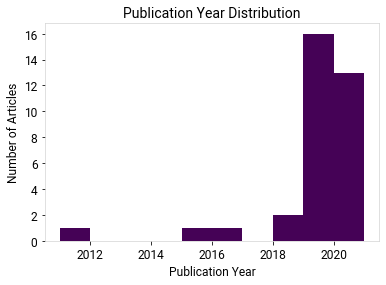

In [10]:
plt.hist(df['Year'])
plt.title('Publication Year Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.show()

<AxesSubplot:title={'center':'Number of Articles per Use Case'}>

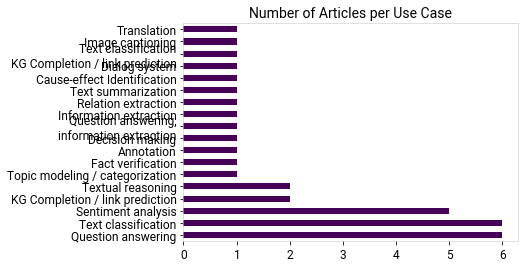

In [11]:
df['Business Use Case'].value_counts().plot(kind='barh', title="Number of Articles per Use Case")

<AxesSubplot:title={'center':'Number of articles per type of learning'}>

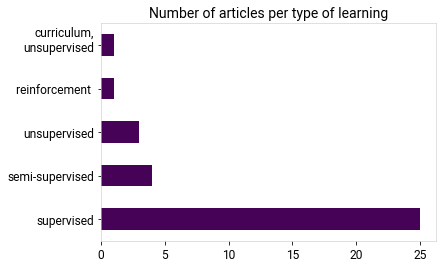

In [12]:
df['Type of Learning'].value_counts().plot(kind='barh', title="Number of articles per type of learning")

In [13]:
app_value_counts = df['Technical Application'].value_counts()


In [14]:
app_value_counts

classification                24
generative                     5
inference                      3
similarity                     1
classification,\ninference     1
Name: Technical Application, dtype: int64

In [16]:
app_value_counts['inference']+=app_value_counts['classification,\ninference']
app_value_counts['classification']+=app_value_counts['classification,\ninference']

In [17]:
app_value_counts.pop('classification,\ninference')


1

In [18]:
app_value_counts

classification    25
generative         5
inference          4
similarity         1
Name: Technical Application, dtype: int64

<AxesSubplot:title={'center':'Number of articles per application'}>

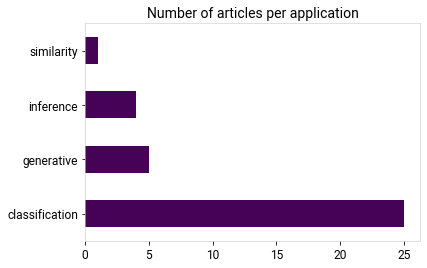

In [19]:
app_value_counts.plot(kind='barh', title="Number of articles per application")

In [20]:
nesy_value_counts = df['NeSy Category'].value_counts()

In [21]:
nesy_value_counts

sequential     15
compiled       10
cooperative     6
nested          3
Name: NeSy Category, dtype: int64

<AxesSubplot:title={'center':'Number of articles per NeSy Category'}>

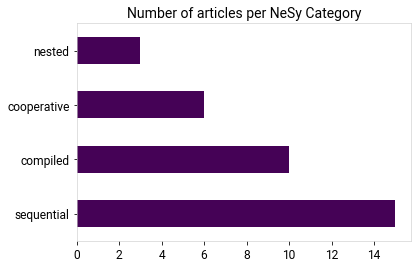

In [22]:
nesy_value_counts.plot(kind='barh', title="Number of articles per NeSy Category")

<AxesSubplot:title={'center':'Number of articles per Kautz category'}>

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0, flags=flags)


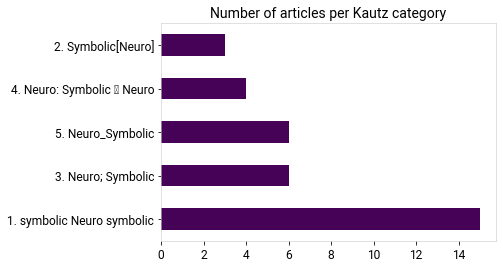

In [23]:
df['Kautz category'].value_counts().plot(kind='barh', title="Number of articles per Kautz category")

In [24]:
df['Kautz category'].value_counts()

1. symbolic Neuro symbolic    15
3. Neuro; Symbolic             6
5. Neuro_Symbolic              6
4. Neuro: Symbolic → Neuro     4
2. Symbolic[Neuro]             3
Name: Kautz category, dtype: int64

In [25]:
seq_df = df[df['NeSy Category']=='sequential']

In [26]:
app_value_counts = seq_df['Technical Application'].value_counts()

In [27]:
app_value_counts

classification    13
similarity         1
inference          1
Name: Technical Application, dtype: int64

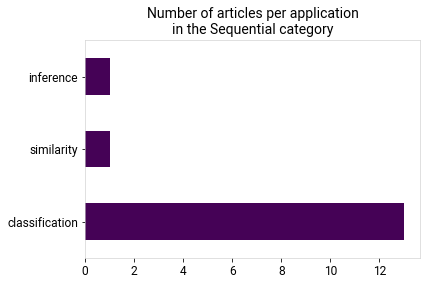

In [28]:
app_value_counts.plot(kind='barh', title="Number of articles per application\nin the Sequential category")
plt.savefig("images/seq_category.svg", format="svg")

In [29]:
df['Symbolic terms'].unique()

array(['deduction,\ndependency parsing,\nrule based',
       'semantic enrichment', 'first order logic (FOL)',
       'first order logic (FOL),\nknowledge graph (KG)', 'sememe',
       'rule based,\nsemantic enrichment',
       'symbolic learner,\nsymbolic representations,\nConceptNet KG',
       'logic',
       'statistical relational learning (SLR),\nfuzzy logic,\nfirst order logic (FOL),\ntransductive learning,\ngrounding,\npropositionalization,\nsemantic enrichment',
       'first order logic (FOL),\nHuffman tree',
       'semantic enrichment,\ndependency parsing',
       'commonsense knowledge,\ngraph representation',
       'knowledge graph (KG)',
       'Sequencial decision making,\npredicate logic,\nrelational logic,\nrule based,\nrule induction,\ncognitive linguistics',
       'fuzzy logic,\nfuzzy neural network (FNN),\nlogical connectives',
       'fuzzy logic,\nNeutrosophy', 'symbolic processing', 'semantic net',
       'fuzzy logic,\nfuzzy rules,\nmamdani fuzzy system (MFS)

In [30]:
df['Neural terms'].unique()

array(['recurrent neural network (RNN)', 'logic tensor network (LTN)',
       'graph neural network (GNN)', 'neural network (NN)', 'SVM',
       'SVM,\nneuroevolution (NE)',
       'recursive neural knowledge network (RNKN),\nrecursive neural network (RcNN)',
       'reinforcement learning (RL),\nMemory Network,\nneural network (NN)\n',
       'convolutional neural network (CNN),\nrecurrent neural network (RNN),\ndeep belief network (DBN)',
       'transformer',
       'convolutional neural network (CNN),\nrecurrent neural network (RNN)',
       'convolutional neural network (CNN),\nneural network (NN)',
       'convolutional neural network (CNN)',
       'attention network (Attn),\ngraph neural network (GNN)',
       'recurrent neural network (RNN),\nreinforcement learning (RL)',
       'recursive neural network (RcNN),\nTensor Product Representation (TPR)',
       'recurrent neural network (RNN),\nconvolutional neural network (CNN),\nattention network (Attn)',
       'Tensor Product 

<AxesSubplot:title={'center':'study quality'}, ylabel='Frequency'>

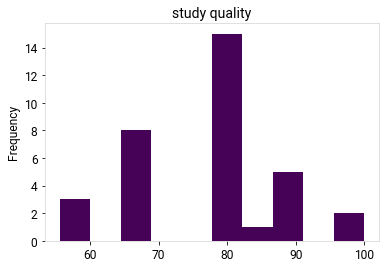

In [31]:
df['Study Quality'].str.rstrip('%').astype('float').plot(kind='hist',title="study quality")

In [32]:
df['Datasets'].value_counts()

Private                                                                                                                                                                               2
CEMR                                                                                                                                                                                  1
CLEVR                                                                                                                                                                                 1
AffectiveText, ISEAR, and Fairy Tales, Facebook posts                                                                                                                                 1
Spider                                                                                                                                                                                1
UIUC dataset,                                                                   

In [33]:
# symbolic terms
sym_terms=df['Symbolic terms']
sym_list=[[i.strip(' ').rstrip(',') for i in str(s).split("\n")] for s in sym_terms]

In [34]:
sym_list

[['deduction', 'dependency parsing', 'rule based'],
 ['semantic enrichment'],
 ['first order logic (FOL)'],
 ['first order logic (FOL)', 'knowledge graph (KG)'],
 ['semantic enrichment'],
 ['sememe'],
 ['rule based', 'semantic enrichment'],
 ['symbolic learner', 'symbolic representations', 'ConceptNet KG'],
 ['logic'],
 ['statistical relational learning (SLR)',
  'fuzzy logic',
  'first order logic (FOL)',
  'transductive learning',
  'grounding',
  'propositionalization',
  'semantic enrichment'],
 ['first order logic (FOL)', 'Huffman tree'],
 ['semantic enrichment', 'dependency parsing'],
 ['commonsense knowledge', 'graph representation'],
 ['knowledge graph (KG)'],
 ['Sequencial decision making',
  'predicate logic',
  'relational logic',
  'rule based',
  'rule induction',
  'cognitive linguistics'],
 ['fuzzy logic', 'fuzzy neural network (FNN)', 'logical connectives'],
 ['fuzzy logic', 'Neutrosophy'],
 ['symbolic processing'],
 ['semantic net'],
 ['fuzzy logic', 'fuzzy rules', 'ma

In [35]:
neu_terms=df['Neural terms']
neu_list=[[i.rstrip(',') for i in str(s).split("\n")] for s in neu_terms]

In [36]:
neu_list

[['recurrent neural network (RNN)'],
 ['recurrent neural network (RNN)'],
 ['recurrent neural network (RNN)'],
 ['logic tensor network (LTN)'],
 ['graph neural network (GNN)'],
 ['neural network (NN)'],
 ['SVM'],
 ['SVM', 'neuroevolution (NE)'],
 ['recurrent neural network (RNN)'],
 ['SVM'],
 ['recursive neural knowledge network (RNKN)',
  'recursive neural network (RcNN)'],
 ['SVM'],
 ['SVM'],
 ['recurrent neural network (RNN)'],
 ['reinforcement learning (RL)', 'Memory Network', 'neural network (NN)', ''],
 ['convolutional neural network (CNN)',
  'recurrent neural network (RNN)',
  'deep belief network (DBN)'],
 ['neural network (NN)'],
 ['transformer'],
 ['convolutional neural network (CNN)', 'recurrent neural network (RNN)'],
 ['convolutional neural network (CNN)', 'neural network (NN)'],
 ['recurrent neural network (RNN)'],
 ['recurrent neural network (RNN)'],
 ['convolutional neural network (CNN)'],
 ['attention network (Attn)', 'graph neural network (GNN)'],
 ['recurrent neural

In [37]:
sym_set=set(sum(sym_list,[]))

In [38]:
neu_set=set(sum(neu_list,[]))

In [39]:
neu_set=neu_set-(set(['']))

In [40]:
neu_set

{'Memory Network',
 'SVM',
 'Tensor Product Representation (TPR)',
 'attention network (Attn)',
 'convolutional neural network (CNN)',
 'deep belief network (DBN)',
 'graph neural network (GNN)',
 'logic tensor network (LTN)',
 'neural network (NN)',
 'neuroevolution (NE)',
 'recurrent neural network (RNN)',
 'recursive neural knowledge network (RNKN)',
 'recursive neural network (RcNN)',
 'reinforcement learning (RL)',
 'transformer'}

In [41]:
sym_set

{'ConceptNet KG',
 'Huffman tree',
 'Neutrosophy',
 'Sequencial decision making',
 'binding problem',
 'case based reasoning (CBR)',
 'cognitive linguistics',
 'commonsense knowledge',
 'constituency parsing',
 'deduction',
 'dependency parsing',
 'domain specific language (DSL)',
 'first order logic (FOL)',
 'fuzzy logic',
 'fuzzy neural network (FNN)',
 'fuzzy rules',
 'graph reasoning',
 'graph representation',
 'grounding',
 'knowledge graph (KG)',
 'logic',
 'logical connectives',
 'mamdani fuzzy system (MFS)',
 'ontology',
 'predicate logic',
 'program synthesis',
 'propositionalization',
 'relational logic',
 'rule based',
 'rule induction',
 'semantic enrichment',
 'semantic net',
 'semantic parsing',
 'sememe',
 'statistical relational learning (SLR)',
 'symbolic learner',
 'symbolic node embedding',
 'symbolic processing',
 'symbolic representations',
 'transductive learning'}

In [42]:
tup_dict=defaultdict(int)
for i in range(len(sym_list)):
    lists = list(itertools.product(sym_list[i],neu_list[i]))
    
    for j in lists:
        tup_dict[j]+=1


In [43]:
tup_dict

defaultdict(int,
            {('deduction', 'recurrent neural network (RNN)'): 1,
             ('dependency parsing', 'recurrent neural network (RNN)'): 1,
             ('rule based', 'recurrent neural network (RNN)'): 3,
             ('semantic enrichment', 'recurrent neural network (RNN)'): 3,
             ('first order logic (FOL)', 'recurrent neural network (RNN)'): 1,
             ('first order logic (FOL)', 'logic tensor network (LTN)'): 1,
             ('knowledge graph (KG)', 'logic tensor network (LTN)'): 1,
             ('semantic enrichment', 'graph neural network (GNN)'): 1,
             ('sememe', 'neural network (NN)'): 1,
             ('rule based', 'SVM'): 2,
             ('semantic enrichment', 'SVM'): 3,
             ('symbolic learner', 'SVM'): 1,
             ('symbolic learner', 'neuroevolution (NE)'): 1,
             ('symbolic representations', 'SVM'): 1,
             ('symbolic representations', 'neuroevolution (NE)'): 1,
             ('ConceptNet KG', 'SVM'): 1

In [44]:
d=defaultdict(dict)

for i in sym_set:
    inner_dict=defaultdict(dict)
    for j in neu_set:
        inner_dict[j]=tup_dict[(i,j)]
    d[i]=inner_dict
    
assd=pd.DataFrame(d)

In [45]:
assd

,semantic net,semantic enrichment,cognitive linguistics,logical connectives,sememe,relational logic,propositionalization,commonsense knowledge,symbolic learner,constituency parsing,...,ontology,symbolic node embedding,dependency parsing,knowledge graph (KG),ConceptNet KG,semantic parsing,case based reasoning (CBR),binding problem,grounding,program synthesis
attention network (Attn),0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
reinforcement learning (RL),0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neuroevolution (NE),0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
recursive neural network (RcNN),0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Memory Network,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
recursive neural knowledge network (RNKN),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
recurrent neural network (RNN),1,3,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,0,0
transformer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SVM,0,3,0,0,0,0,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
neural network (NN),0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


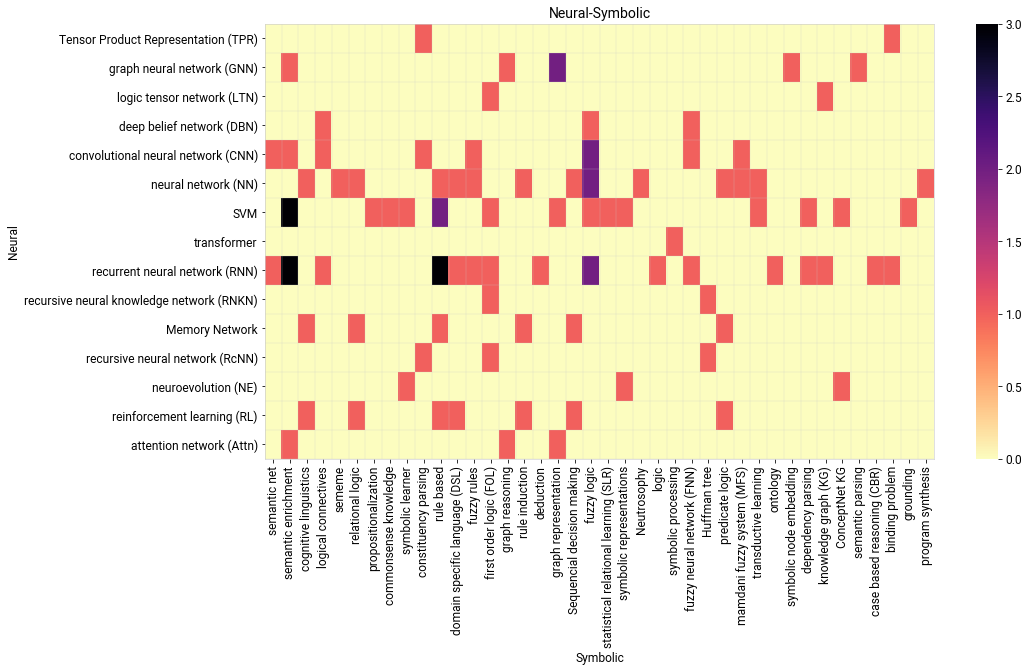

In [46]:
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()
fig, ax = plt.subplots(figsize=(15, 8))
color_map = plt.cm.get_cmap('magma')
reversed_color_map = color_map.reversed()

plt.hlines(y=np.arange(0, len(assd.index), 1), xmin=np.full(len(assd.index),0), xmax=np.full(len(assd.index),len(assd.columns)), color="#cccccc", linewidth=.25)
plt.vlines(x=np.arange(0, len(assd.columns), 1), ymin=np.full(len(assd.columns),0), ymax=np.full(len(assd.columns),len(assd.index)), color="#cccccc",linewidth=.25)
plt.yticks(np.arange(0.5, len(assd.index), 1), assd.index)
plt.xticks(np.arange(0.5, len(assd.columns), 1), assd.columns, rotation=90)
plt.ylabel("Neural")
plt.xlabel("Symbolic")
plt.title("Neural-Symbolic")

graph=plt.pcolor(assd, cmap=reversed_color_map)
cb = fig.colorbar(graph)
# cb.set_label('Support', rotation=0, va='bottom')
cb.outline.set_visible(False)
plt.show()

In [47]:
df.columns

Index(['Doc type', 'Researcher', 'citation', 'Title', 'Scopus Hash ID', 'DOI',
       'Journal/Conference', 'Year', 'Business Use Case',
       'Technical Application', 'Type of Learning', 'Key-intake',
       'Contribution', 'Authors Definition of NeSy', 'Symbolic terms',
       'Neural terms', 'NeSy Category', 'Kautz category', 'Datasets',
       'Model description', 'Evaluation Metrics', 'Reported Score',
       'Study Quality', 'Comments', 'MISC', 'eliminate'],
      dtype='object')

In [48]:
df_seq = df[df['NeSy Category'] == 'sequential']
df_seq['Technical Application'].value_counts()

classification    13
similarity         1
inference          1
Name: Technical Application, dtype: int64

In [49]:
df_cat_goals = df[['NeSy Category']]

In [50]:
df.groupby('NeSy Category').count()

,Doc type,Researcher,citation,Title,Scopus Hash ID,DOI,Journal/Conference,Year,Business Use Case,Technical Application,...,Neural terms,Kautz category,Datasets,Model description,Evaluation Metrics,Reported Score,Study Quality,Comments,MISC,eliminate
NeSy Category,,,,,,,,,,,,,,,,,,,,,
compiled,10,10,10,10,10,6,10,10,10,10,...,10,10,10,10,10,10,10,10,3,0
cooperative,6,6,6,6,6,5,6,6,6,6,...,6,6,6,6,6,6,6,6,1,0
nested,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,0,0
sequential,15,15,15,15,15,13,15,15,15,15,...,15,15,15,15,14,13,15,15,5,0


# STOP HERE
The rest has to do with secondary studies, ie rerefence papers. We are not reviewing these.

# Get all the references for all papers

In [51]:
# let's get the abstracts from scopus of all the articles we included. 
# We'll do a search on scopus for EID and DOI
# 'Scopus Hash ID', 'DOI',

df[['Scopus Hash ID','DOI']]

,Scopus Hash ID,DOI
0,2-s2.0-85064856751,10.1007/978-3-030-15719-7_13
1,2-s2.0-85067488804,10.1007/978-3-030-20521-8_54
2,2-s2.0-85072850367,10.1007/978-3-030-30490-4_16
3,2-s2.0-85075592929,10.1007/978-3-030-31095-0_11
4,2-s2.0-85096590382,10.1007/978-3-030-61609-0_51
5,2-s2.0-85113718164,10.1007/978-3-030-82147-0_34
6,2FCUJH2G,10.1007/s10462-010-9188-4
7,JN4IZETG,10.1007/s10994-021-05968-x
8,7MMJY5BM,10.1007/s13218-019-00601-5
9,7Q5JRVK2,10.1016/j.artint.2015.08.011


The two studies missing a DOI:
* 2-s2.0-85106687657
* 2-s2.0-85105153943

Scopus search which makes references(25)scopus.csv:
<pre>
DOI ("10.1007/978-3-030-48279-4_55" OR "10.1016/j.neunet.2016.09.001"  OR  "10.1108/IJWIS-11-2020-0067"  OR  "10.1007/s10994-021-05968-x"  OR 
"10.1016/j.eswa.2016.01.007"  OR "10.1016/j.neucom.2020.12.040"  OR  "10.1007/s10462-010-9188-4"  OR  "10.1016/j.patrec.2019.04.024"  OR  
"10.1016/j.neucom.2021.02.021"  OR "10.1109/ACCESS.2020.2972751"  OR  "10.1016/j.neunet.2018.06.012"  OR  "10.1016/j.artmed.2019.101772"  OR 
"10.1007/978-3-030-61609-0_51"  OR "10.1109/ACCESS.2019.2948081"  OR  "10.1109/TASLP.2021.3082295"  OR  "10.1109/ACCESS.2020.3019586"  OR  
"10.1016/j.artint.2015.08.011"  OR "10.1007/978-3-030-82147-0_34"  OR  "10.1016/j.neucom.2017.10.010"  OR  "10.1109/ACCESS.2021.3053917"  OR
"10.1007/s13218-019-00601-5"  OR "10.1007/s12065-019-00301-x"  OR  "10.1145/3453483.3454047" OR "10.1016/j.neunet.2012.02.013" OR
"10.1007/s11042-019-08125-8")  

OR  EID ( "2-s2.0-85106687657"  OR  "2-s2.0-85105153943" ) 
</pre>

In [53]:
# get the articles
all_papers=pd.read_csv('Data/scopus(27).csv')

In [54]:
all_papers=all_papers[['EID','Title','References']]

In [55]:
len(all_papers) #.columns
# should be 25!

27

In [56]:
len(all_papers['Title'].unique())
# should be 25!

27

In [57]:
all_papers=all_papers.drop_duplicates(subset="Title")

In [58]:
all_papers.columns

Index(['EID', 'Title', 'References'], dtype='object')

In [59]:
# references are separated by a semi-colon. Create a list by splitting on ;
all_papers['References']=all_papers['References'].str.split(pat=";")

In [60]:
# put each citation in its own row
all_papers=all_papers.explode('References')

In [61]:
all_papers=all_papers.reset_index(drop=True)

In [65]:
all_papers.to_csv('Data/references(27)exploded.csv')

In [66]:
# add scopus data to references

refs_df = pd.read_csv('Data/references(27)scopus.csv')

In [67]:
# extract just the relevant fields
refs_df=refs_df[['Authors','Title','Abstract','DOI','Year','Cited by','Author Keywords',
         'Index Keywords','EID']]

<AxesSubplot:>

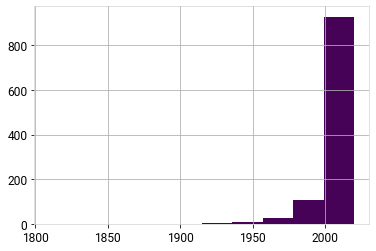

In [68]:
refs_df.query('Year > 0')['Year'].hist()

In [69]:
years=refs_df.query('Year > 0')['Year'].value_counts()
years_arr=list(zip(years.index, years.values))
sorted(years_arr, key=lambda t: -t[0])

[(2020, 61),
 (2019, 93),
 (2018, 99),
 (2017, 103),
 (2016, 76),
 (2015, 77),
 (2014, 54),
 (2013, 55),
 (2012, 29),
 (2011, 33),
 (2010, 30),
 (2009, 25),
 (2008, 35),
 (2007, 16),
 (2006, 25),
 (2005, 20),
 (2004, 17),
 (2003, 21),
 (2002, 17),
 (2001, 15),
 (2000, 14),
 (1999, 14),
 (1998, 12),
 (1997, 12),
 (1996, 9),
 (1995, 15),
 (1994, 8),
 (1993, 1),
 (1992, 5),
 (1991, 10),
 (1990, 11),
 (1989, 5),
 (1988, 2),
 (1987, 5),
 (1986, 6),
 (1985, 1),
 (1983, 2),
 (1982, 1),
 (1980, 2),
 (1979, 1),
 (1975, 4),
 (1974, 4),
 (1973, 1),
 (1972, 2),
 (1970, 1),
 (1969, 3),
 (1968, 3),
 (1967, 2),
 (1966, 1),
 (1965, 2),
 (1962, 2),
 (1958, 1),
 (1957, 1),
 (1956, 2),
 (1953, 1),
 (1952, 1),
 (1949, 1),
 (1947, 1),
 (1943, 1),
 (1937, 1),
 (1931, 1),
 (1926, 1),
 (1810, 1)]

In [70]:
# Extracts ref titles from the references
all_papers['ref_title']=all_papers['References'].str.extract('(.*?)\(\d+\)', expand=True) #.reset_index(level=0, drop=True)

In [71]:
pd.set_option('display.max_colwidth', None)
# all_papers['ref_title']

In [72]:
# split on comma and get last element. that's the title.
all_papers['ref_title']=all_papers['ref_title'].str.split(pat=",").str[-1]

In [73]:
all_papers['ref_title']=all_papers['ref_title'].str.strip()

In [74]:
# join on title with scopus reference df - refs_df
all_papers

,EID,Title,References,ref_title
0,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Ahn, S., Choi, H., Pärnamaa, T., Bengio, Y., (2017) A neural knowledge language model, , CoRR abs/1608.00318",
1,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Bengio, Y., Schwenk, H., Senecal, J.-S., Morin, F., Gauvain, J.-L., (2006) Neural probabilistic language models",
2,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Besold, T. R., d'Avila Garcez, A. S., Bader, S., Bowman, H., Domingos, P. M., Hitzler, P., Kühnberger, K.-U., Zaverucha, G., (2017) Neural-symbolic learning and reasoning: A survey and interpretation, , ArXiv abs/1711.03902",
3,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Chelba, C., Mikolov, T., Schuster, M., Ge, Q., Brants, T., Koehn, P., One billion word benchmark for measuring progress in statistical language modeling (2013) INTERSPEECH",One billion word benchmark for measuring progress in statistical language modeling
4,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Firth, J. R., (1957) A synopsis of linguistic theory 1930-55, pp. 1-32. , 1952 59",
...,...,...,...,...
1149,2-s2.0-85106847388,Sentence-Level Classification Using Parallel Fuzzy Deep Learning Classifier,"(2020) COVID-19-Sentiments India[20/03/20-31/05/20], , https://kaggle.com/abhaydhiman/covid19-sentiments, Accessed: Dec. 30",
1150,2-s2.0-85106847388,Sentence-Level Classification Using Parallel Fuzzy Deep Learning Classifier,"Gangadharan, V., Gupta, D., Amritha, L., Athira, T.A., Paraphrase detection using deep neural network based word embedding techniques (2020) Proc. 4th Int. Conf. Trends Electron. Informat. (ICOEI), pp. 517-521. , Jun",Paraphrase detection using deep neural network based word embedding techniques
1151,2-s2.0-85106847388,Sentence-Level Classification Using Parallel Fuzzy Deep Learning Classifier,"Pennington, J., Socher, R., Manning, C., Glove: Global vectors for word representation (2014) Proc. Conf. Empirical Methods Natural Lang. Process. (EMNLP), pp. 1532-1543",Glove: Global vectors for word representation
1152,2-s2.0-85106847388,Sentence-Level Classification Using Parallel Fuzzy Deep Learning Classifier,"Mikolov, T., Sutskever, I., Chen, K., Corrado, G., Dean, J., (2013) Distributed Representations of Words and Phrases and Their Compositionality, , http://arxiv.org/abs/1310.4546, arXiv:1310.4546",


In [75]:
new_df = pd.merge(all_papers, refs_df,  how='left', left_on='ref_title', right_on = 'Title')


In [76]:
len(new_df[new_df['Title_y'].notnull()])

556

In [77]:
new_df.to_csv('Data/references(27)merged.csv', index=False)

In [78]:
len(new_df)

1169

In [79]:
new_df.columns

Index(['EID_x', 'Title_x', 'References', 'ref_title', 'Authors', 'Title_y',
       'Abstract', 'DOI', 'Year', 'Cited by', 'Author Keywords',
       'Index Keywords', 'EID_y'],
      dtype='object')

In [81]:
qq_df = pd.read_csv('Data/qq(27).csv')

In [82]:
qq_df = qq_df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9','Q10']]

In [83]:
qq_df.describe()

,Q1,Q2,Q3,Q4,Q6,Q7,Q8,Q9,Q10
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,27.000000,27.000000
mean,0.826923,0.846154,0.788462,0.846154,0.865385,0.596154,0.100000,0.185185,0.240741
std,0.314398,0.308844,0.378763,0.339683,0.301917,0.490290,0.288675,0.395847,0.401209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.625000,1.000000,0.625000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Annotated reference papers
In the first screening, the papers have been marked for inclusion based on title/abstract

In [84]:
ref_ann_df = pd.read_csv('Data/references(27)merged_annotated.csv')

In [85]:
ref_ann_df.columns

Index(['EID_x (of the original paper)', 'Title_x (of the original paper)',
       'References (from the original 27 papers)',
       'ref_title (extracted using regex from References from the original papers)',
       'Abstract', ' keep (NeSy)', 'keep (background)', 'Kyle', 'Aparna',
       'Title_y (from scopus)', 'EID_y', 'DOI', 'Unnamed: 12', 'Year',
       'Cited by', 'Authors', 'Author Keywords', 'Index Keywords'],
      dtype='object')